
# Esquema implícito de convección - difusión

In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import math

Consideremos la siguiente ecuación parabólica:

$u_t = \alpha u_{xx} + b u_x$ para $0\leq x \leq L$ y $0 \leq t \leq T$

Con las condiciones de frontera:

$u(0,t)=0$ y $u(L,t)=0$ para $0\leq t \leq T$

Y con la condición inicial:

$u(x,0)=f(x)$ para $0\leq x \leq L$

Ahora cogeremos el número de nodos que tomaremos en cada intervalo. $Nx-1$ será el número de nodos interiores que tomaremos en el intervalo $[0,L]$ y $Nt-1$ será el número de nodos interiores que tomaremos en el intervalo $[0,T]$ (Es decir, si al final tendremos $Nt+1$ puntos contando los de los extremos en cada intervalo). 

A continuación, $a$ indica $\alpha$. Para comenzar de forma sencilla vamos a considerar $\alpha=1$.

In [3]:
from numpy import linspace, array

In [4]:
import ipywidgets

In [27]:
def conv_difus_1d(D, c, ua, ub, Nx, Nt, a, b, T1, T2):
    
    x = linspace(a, b, Nx+1)   # creamos la partición en el espacio
    dx = x[1] - x[0]           # paso del espacio
    t = linspace(T1, T2, Nt+1)    # creamos la partición en el tiempo
    dt = t[1] - t[0]            # paso del tiempo
    s = D*dt/dx**2              
    k = c*dt/dx
    u   = zeros(Nx+1)          # vector u desconocido en el siguiente nivel de tiempo
    u_1 = zeros(Nx+1)          # vector u en el nivel de tiempo anterior
    def I(x):return sin(pi*x)

# Creamos la matriz del esquema
    A = zeros((Nx+1, Nx+1))

    for i in range(1, Nx):
        A[i,i-1] = -(s+k)
        A[i,i+1] = -s
        A[i,i] = 1 + 2*s + k
    A[0,0] = A[Nx,Nx] = 1

# Fijamos la condición inicial
    
    for i in range(0, Nx):
        u_1[i] = I(x[i])
    u_1[0] = u_1[Nx] = ua

    v=[u_1]
    from numpy.linalg import solve
    for n in range(0, Nt+1):
        u = solve(A, u_1)
        v.extend([u])
        u_1 = u
    return x, t, v

In [28]:
x_h, t_h, u_h = conv_difus_1d(1,1,0,0,7,5,0,1,0,1) 
x_h
t_h
u_h

[array([ 0.        ,  0.43388374,  0.78183148,  0.97492791,  0.97492791,
         0.78183148,  0.43388374,  0.        ]),
 array([  3.81639165e-16,   1.24699842e-01,   2.35664571e-01,
          3.06750086e-01,   3.19809263e-01,   2.67885196e-01,
          1.56099906e-01,   0.00000000e+00]),
 array([  4.86961661e-16,   3.85298336e-02,   7.37710711e-02,
          9.75270263e-02,   1.03327398e-01,   8.78664070e-02,
          5.18274393e-02,   0.00000000e+00]),
 array([  5.22585447e-16,   1.21915777e-02,   2.34372323e-02,
          3.11533030e-02,   3.31988405e-02,   2.83806225e-02,
          1.68041096e-02,   0.00000000e+00]),
 array([  5.34976329e-16,   3.88882880e-03,   7.48598529e-03,
          9.96934301e-03,   1.06458376e-02,   9.11764734e-03,
          5.40553454e-03,   0.00000000e+00]),
 array([  5.30562077e-16,   1.24388680e-03,   2.39557966e-03,
          3.19237094e-03,   3.41146177e-03,   2.92364969e-03,
          1.73410960e-03,   0.00000000e+00]),
 array([  5.30436233e-16,   

In [13]:
t_h

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

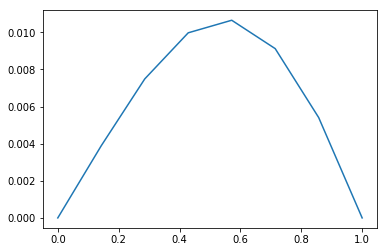

In [12]:
plot(x_h, u_h[4])

In [24]:
def u(x,t):return (exp(-1)-1)**(-1)*(exp(-x)-1)*t+x-t

In [25]:
def U(x): return u(x,0.8)

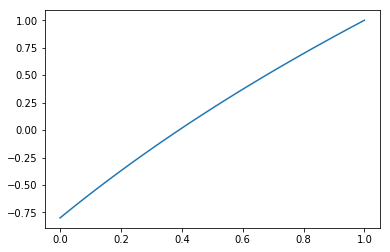

In [26]:
x = linspace(0,1,100)
plot( x, U(x))